In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
import scipy.io as sp
from sklearn.ensemble import IsolationForest, BaggingClassifier

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
#print(y)

In [101]:
nombre_estim = np.arange(1,150,10) #permet de créer une liste de int de 1 à 100 pour faire varier le nombre d'estimateur dans la boucle for 

Comtam = [0.05,0.1,0.2,0.3,0.5]
Comtam
AUC1=0
bool=[False,True]
MS=[1,2,3,4,5,6,7,8,9]
nombre_estim

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141])

In [102]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    for estim in nombre_estim:
            for max_samples in MS:
                    for C in Comtam:
                            for B in bool:
                                    model = IsolationForest(contamination=C, n_estimators=estim, bootstrap=B)
                                    model.fit(X_train)
                                    y_pred=model.predict(X_test)
                                    y_pred[y_pred>0]=0
                                    y_pred[y_pred<0]=1
                                    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                                    roc_auc = metrics.auc(fpr, tpr)
                                    AUC2=roc_auc
                                    if AUC2>AUC1:
                                            AUC1=AUC2
                                            ContaminationP=C
                                            estimP=estim
                                            BootP=B
                                    
                                    
                                    
                                #     fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
                                #     roc_auc = metrics.auc(fpr, tpr)
                                #     plt.subplot(211)
                                #     plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
                                #     #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
                                #     plt.xlim([0.0, 1.0])
                                #     plt.ylim([0.0, 1.0])
                                #     plt.xlabel('False Positive Rate or (1 - Specifity)')
                                #     plt.ylabel('True Positive Rate or (Sensitivity)')
                                #     plt.title('Receiver Operating Characteristic')
                                #     plt.legend(loc="lower right")
                                #     plt.subplot(212)
                                #     precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
                                #     plt.plot(recall, precision)
                                #     plt.xlabel('Recall')
                                #     plt.ylabel('Precision')
                                #     #y_pred1=model.fit_predict(X_test) #Comparaison du .predict et du .fit_predict
                                #     # #y_pred1[y_pred1>0]=0
                                #     # #y_pred1[y_pred1<0]=1
                                #     # #print(".predict") #Comparaison du .predict et du .fit_predict
                                #     #print(classification_report(y_test,y_pred))
                                #     # print(confusion_matrix(y_test, y_pred))
                                #     # #print("fit_predict")
                                #     # #print(classification_report(y_test,y_pred1))
                                #     # #print(confusion_matrix(y_test, y_pred1))
                                    
        
print (AUC1)
print (ContaminationP)
print (estimP)
print (BootP)
       
            
    
       


0.9648724354606708
0.5
1
True


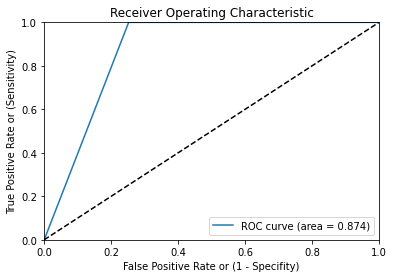

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
 

0.3


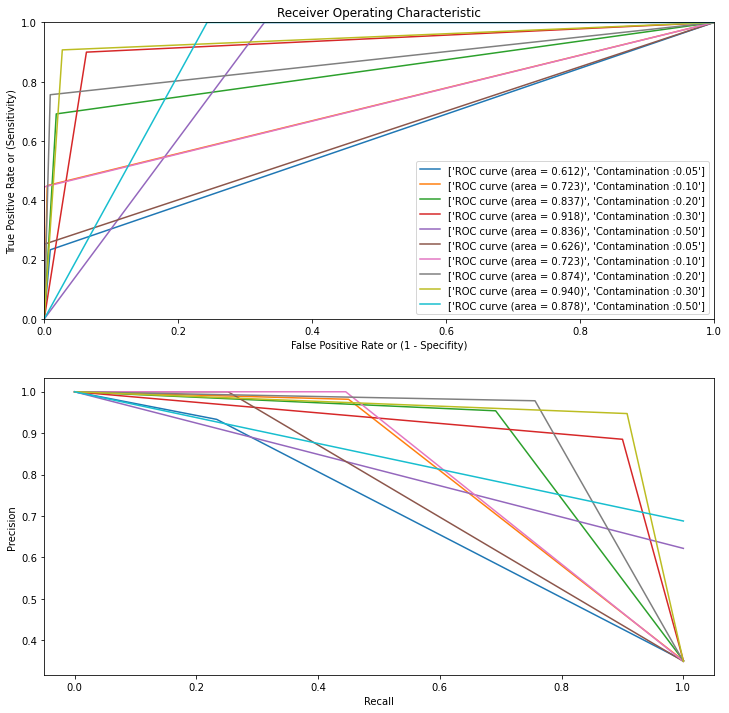

In [79]:
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure
plt.figure(figsize=(12.0,12.0))
AUC1=0

skf = StratifiedKFold(n_splits=2) 
skf.get_n_splits(X, y) #get and split return n split

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    for C in Comtam:
        model = IsolationForest(contamination=C, n_estimators=100)
        model.fit(X_train)
        y_pred=model.predict(X_test)
        y_pred[y_pred>0]=0
        y_pred[y_pred<0]=1
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.subplot(211)
        
        plt.plot(fpr, tpr, label=['ROC curve (area = %0.3f)' % roc_auc,"Contamination :%0.2f"  %C])
        AUC2=roc_auc
        #plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate or (1 - Specifity)')
        plt.ylabel('True Positive Rate or (Sensitivity)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.subplot(212)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        
        if AUC2>AUC1:
            AUC1=AUC2
            ContaminationP=C
            



print (ContaminationP)
            
        
            
    